In [1]:
import pandas as pd
import calendar
import glob as glob
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
tmx = pd.read_csv("./data/tmix_complete.csv",
       index_col=0, parse_dates=True)
tmx.head()

,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,WDir_Avg,Rain_Tot,Press_Avg,Rad_Avg
TIMESTAMP,,,,,,,,
2016-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
tmx.index.strftime("%H:%M")    #Esto cambia el indice a solo horas y minutos 
tmx

,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,WDir_Avg,Rain_Tot,Press_Avg,Rad_Avg
TIMESTAMP,,,,,,,,
2016-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,23.76,39.46,1.174,1.925,260.9,0.0,876.117,1.180
2022-12-31 20:00:00,20.67,47.59,2.575,3.875,326.6,0.0,876.620,-0.842
2022-12-31 21:00:00,19.93,48.74,1.736,3.350,331.0,0.0,877.301,-1.512


In [4]:
matriz = tmx['Temp_Avg'].groupby(by=[tmx.index.strftime("%m"),tmx.index.strftime("%H:%M")]).mean().unstack().T
# Primero desechamos el a;o al agrupar por mes, despues agrupamos por hora y minuto y despues hacemos las operaciones
matriz.columns = [calendar.month_abbr[i].capitalize() for i in [1,2,3,4,5,6,7,8,9,12]]
matriz

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Dec
TIMESTAMP,,,,,,,,,,
00:00,19.671290,21.172976,23.489677,24.202394,25.376129,21.425000,21.354516,20.674333,20.151333,18.616452
01:00,18.984516,20.384286,22.606129,23.513803,24.578065,20.845000,20.981452,20.276000,19.827000,17.966774
02:00,18.368387,19.645119,21.762823,22.810986,23.696290,20.513667,20.486613,20.041500,19.591667,17.330968
03:00,17.827419,19.047262,21.039194,22.108732,23.125645,20.102000,20.023548,19.685333,19.278667,16.826452
04:00,17.404516,18.406786,20.384032,21.479296,22.447581,19.797333,19.647903,19.336500,18.928667,16.256774
05:00,16.871290,17.788095,19.715968,20.896197,21.923548,19.470333,19.331452,19.004000,18.680000,15.756129
06:00,16.364516,17.251310,19.069274,20.273099,21.386774,19.179000,18.924194,18.735667,18.417000,15.364516
07:00,15.948065,16.725476,18.526613,19.829577,21.111774,19.162000,18.717419,18.515333,18.198667,14.924839
08:00,15.738710,16.652857,19.080000,21.243099,22.743710,20.221000,19.765968,19.629167,19.293333,14.962903


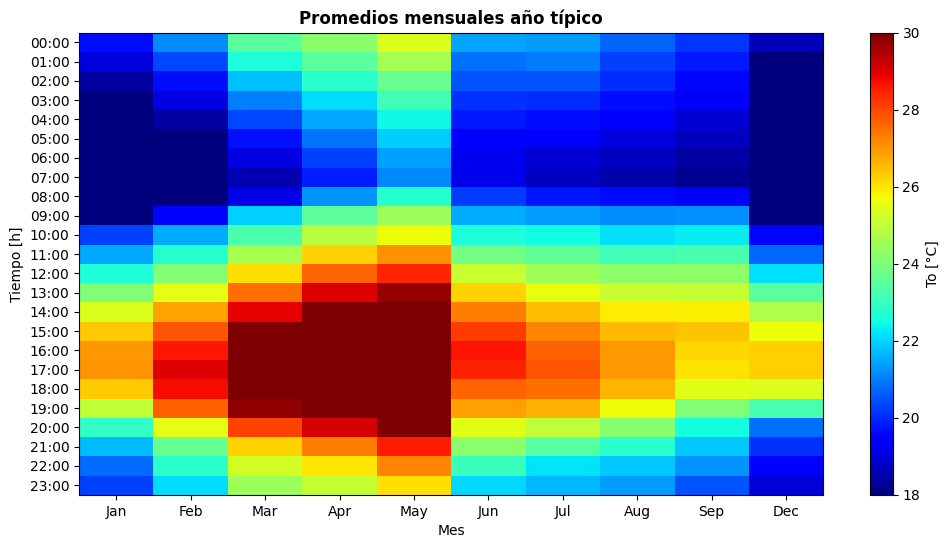

In [5]:
#Hacerlo bonito de tarea 

fig, ax = plt.subplots(figsize = (12,6))

desde = matriz.min().mean().round()
hasta = matriz.max().mean().round()+1.

ax.imshow(matriz, aspect='auto',
          cmap="jet", vmin=desde, vmax=hasta
         )

p = ax.imshow(matriz,aspect='auto',cmap='jet',vmin=desde, vmax=hasta)
fig.colorbar(p,label="To [°C]")

plt.title("Promedios mensuales año típico", fontsize=12, fontweight="bold")
ax.set_ylabel("Tiempo [h]")
ax.set_xlabel("Mes")

# Configurar las etiquetas del eje y (índice del DataFrame)
ax.set_yticks(range(len(matriz.index)))  # Posiciones
ax.set_yticklabels(matriz.index)  # Etiquetas del índice

# Configurar las etiquetas del eje x (columnas del DataFrame)
ax.set_xticks(range(len(matriz.columns)))  # Posiciones
ax.set_xticklabels(matriz.columns)  # Etiquetas de las columnas


plt.savefig("Heat_Map_Erick_Romo.jpg", format="jpg")

plt.show()


In [6]:
matriz.min().mean().round()

np.float64(18.0)

In [7]:
matriz.max().mean().round()


np.float64(29.0)